<a href="https://colab.research.google.com/github/SachinScaler/Apr24_TimeSeries_and_RecSys/blob/main/ML_Intro_to_Time_Series_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 46.9MB/s]


In [8]:
import pandas as pd

df = pd.read_excel('mobilesales.xlsx')
df.head(13)

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [6]:
df.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [7]:
18*12+1

217

- All the date entries are present

#### pd.to_datetime() Can be used to convert non-datetime columnns into dt cols

In [10]:
df.describe()

,DATE,Sales
count,217,198.000000
mean,2009-12-31 04:25:26.267281152,10842.757576
min,2001-01-01 00:00:00,108.000000
25%,2005-07-01 00:00:00,8856.000000
50%,2010-01-01 00:00:00,10745.000000
75%,2014-07-01 00:00:00,12399.750000
max,2019-01-01 00:00:00,23740.000000
std,NaN,2605.006293


In [11]:
df.set_index('DATE', inplace =True)
df.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


- Hourly, minutes, second based observation
- Daily Gap
- Weekly Observation
- Monthly Observation
- Quarterly Observation
- Annual Observation
- 5 year Observation

<Axes: xlabel='DATE'>

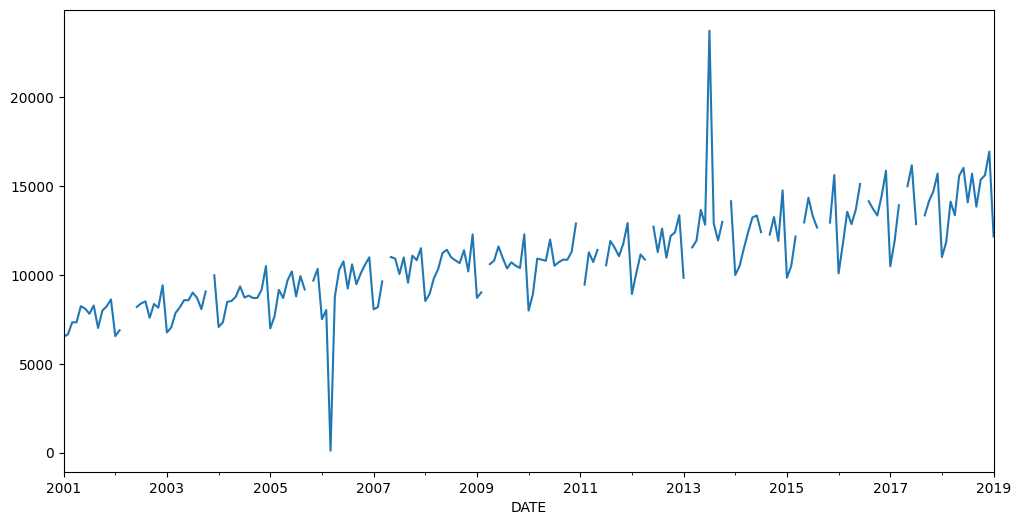

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df.Sales.plot()

### How can we handle Missing Values:

What shall we impute/fill missing values with?

In [17]:
### linear interpolation code

df.Sales = df.Sales.interpolate(method='linear')


<Axes: xlabel='DATE'>

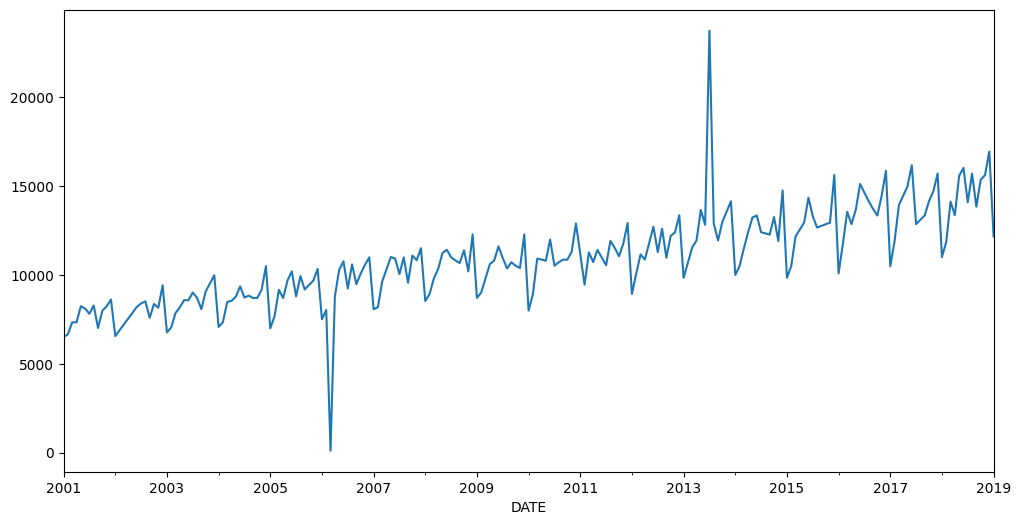

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df.Sales.plot()

[]

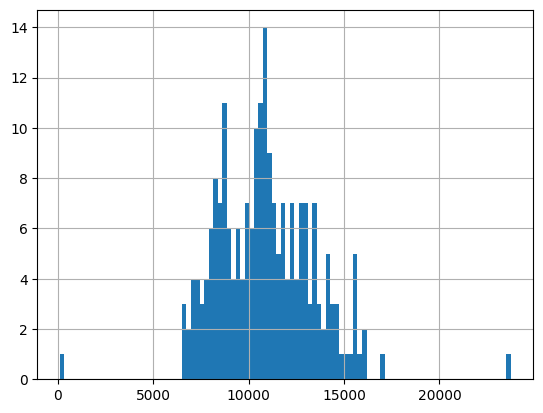

In [21]:
### let's visualize distribution of sales
df.Sales.hist(bins=100).plot()

### <0.02 and 0.98>

In [25]:
lower = df.Sales.quantile(0.02)
lower

6802.44

In [24]:
upper = df.Sales.quantile(0.98)
upper

15809.400000000001

<Axes: xlabel='DATE'>

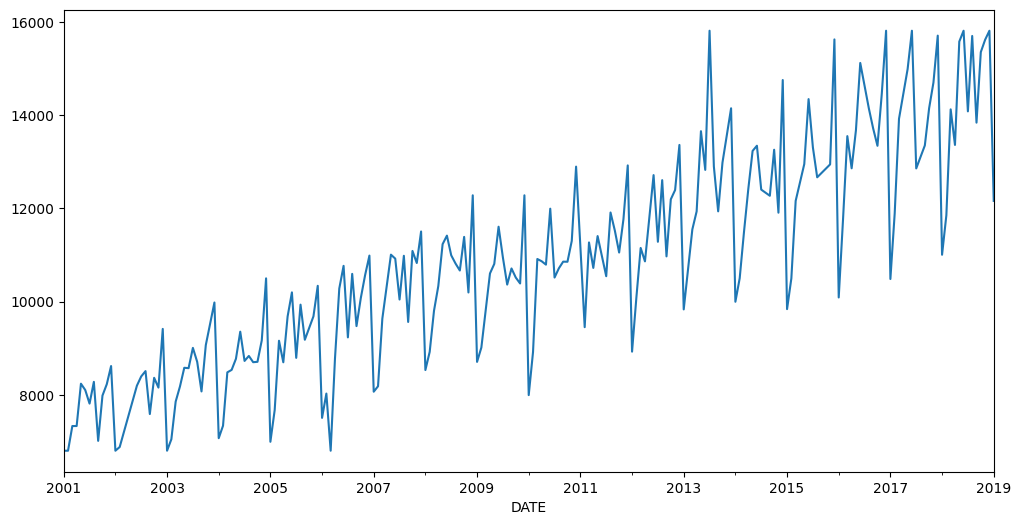

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df.Sales = df.Sales.clip(upper = upper, lower = lower)
df.Sales.plot()

In [29]:
import statsmodels

### Doubt session

In [53]:

df2 = pd.read_excel('mobilesales.xlsx')
df2.head(13)

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0
5,2001-06-01,8104.0
6,2001-07-01,7813.0
7,2001-08-01,8279.0
8,2001-09-01,7014.0
9,2001-10-01,7985.0


In [55]:
df2['year']=df2.DATE.dt.year
df2['month']=df2.DATE.dt.month
df2['date']=df2.DATE.dt.day

df2 = df2.drop('DATE', axis = 1)

In [56]:
df2


,Sales,year,month,date
0,6519.0,2001,1,1
1,6654.0,2001,2,1
2,7332.0,2001,3,1
3,7332.0,2001,4,1
4,8240.0,2001,5,1
...,...,...,...,...
212,13838.0,2018,9,1
213,15351.0,2018,10,1
214,15615.0,2018,11,1
215,16941.0,2018,12,1


### Try regression and Calculate MAPE

Mobile: 8586 83 6627